LAB 1

Task 1.
Import necessary libraries: from tensorflow import keras and ` from tensorflow.keras import layers.

Loadtrain_images, train_labels, test_images, test_labelsfrom data setmnistfromtensorflow.keras.datasets. What are the shape and type of train_imagesandtest_images`?

Preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval: Change tensors train_images and test_images into rank-2 tensors of shape 
, 
, respectively. Change type of these tensors into float32 and standardize them: divide them by the their maximum value.

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 60s 5us/step


In [3]:
print("Train Images Shape:", train_images.shape, "Type:", train_images.dtype)
print("Test Images Shape:", test_images.shape, "Type:", test_images.dtype)

Train Images Shape: (60000, 28, 28) Type: uint8
Test Images Shape: (10000, 28, 28) Type: uint8


In [4]:
train_images = train_images.reshape(60000, 28*28).astype("float32") / 255
test_images = test_images.reshape(10000, 28*28).astype("float32") / 255

print("Reshaped Train Images Shape:", train_images.shape, "Type:", train_images.dtype)
print("Reshaped Test Images Shape:", test_images.shape, "Type:", test_images.dtype)

Reshaped Train Images Shape: (60000, 784) Type: float32
Reshaped Test Images Shape: (10000, 784) Type: float32


Taks 2
Using function Sequential from Keras create a model consisting of a sequence of two densely connected neural layers. The first layer should consists of 512 parameters and its activation function should be reLU. The second (and last) layer is to be a 10-way softmax classification layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of 10 digit classes.

In [5]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)), 
    layers.Dense(10, activation="softmax") 
])
model.summary()

C:\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Task 3
Compile the model using rmsprop algorithm as an optimizer, sparse_categorical_crossentropy as a loss function, and the accuracy (the fraction of the images that were correctly classified) as a metrics.

In [6]:
model.compile(
    optimizer="rmsprop", 
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Task 4
Fit the model to its training data using 5 epochs and batch_size=128.

In [7]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8729 - loss: 0.4380
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9654 - loss: 0.1193
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9782 - loss: 0.0715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9893 - loss: 0.0367


Task 5
Use the trained model to predict class probabilities for digits from test_images and for each digit compare the index with the greatest probability with apropriate element in test_labels. Find the first digit from test_images for which label predicted by the model is different from the true label form test_labels. What is the true digit and its prediction? Plot this digit.

In [8]:
predictions = model.predict(test_images) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
predicted_labels = np.argmax(predictions, axis=1)

for i in range(len(test_labels)):
    if predicted_labels[i] != test_labels[i]:
        first_misclassified_index = i
        break

true_label = test_labels[first_misclassified_index]
predicted_label = predicted_labels[first_misclassified_index]

print(f"First misclassified digit index: {first_misclassified_index}")
print(f"True Label: {true_label}, Predicted Label: {predicted_label}")

First misclassified digit index: 33
True Label: 4, Predicted Label: 0


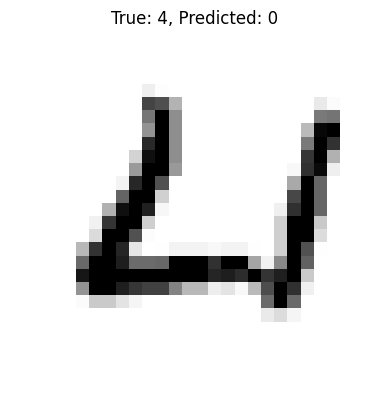

In [31]:
plt.imshow(test_images[first_misclassified_index].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis("off")
plt.show()

Task 6
Evaluate the model on training and test data. Compare the test-set accuracy/loss with the training-set accuracy/loss.

In [14]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Training Loss: 0.0258, Training Accuracy: 0.9933
Test Loss: 0.0620, Test Accuracy: 0.9801


Task 7
Do tasks 4 and 6 using:

100 epochs and batch_size=len(train_labels)
1 epoch and batch_size=1.

In [16]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_full_batch = model.fit(train_images, train_labels, epochs=100, batch_size=len(train_labels), verbose=0)

In [17]:
train_loss_full, train_acc_full = model.evaluate(train_images, train_labels, verbose=0)
test_loss_full, test_acc_full = model.evaluate(test_images, test_labels, verbose=0)

print("100 epochs")
print(f"Training Loss: {train_loss_full:.4f}, Training Accuracy: {train_acc_full:.4f}")
print(f"Test Loss: {test_loss_full:.4f}, Test Accuracy: {test_acc_full:.4f}")

Full Batch Training (100 epochs)
Training Loss: 0.2117, Training Accuracy: 0.9411
Test Loss: 0.2105, Test Accuracy: 0.9398


In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_sgd = model.fit(train_images, train_labels, epochs=1, batch_size=1, verbose=0)

In [20]:
train_loss_sgd, train_acc_sgd = model.evaluate(train_images, train_labels, verbose=0)
test_loss_sgd, test_acc_sgd = model.evaluate(test_images, test_labels, verbose=0)

print("\n1 epoch, batch size 1)")
print(f"Training Loss: {train_loss_sgd:.4f}, Training Accuracy: {train_acc_sgd:.4f}")
print(f"Test Loss: {test_loss_sgd:.4f}, Test Accuracy: {test_acc_sgd:.4f}")


1 epoch, batch size 1)
Training Loss: 0.1971, Training Accuracy: 0.9663
Test Loss: 0.2047, Test Accuracy: 0.9641


Task 9
Check, whether further increasing the number of layers influences the accuracy of a deep learning model. Experiment with various numbers of parameters, batch sizes, and numbers of epochs.

### 2 layers with 100 epoch and batch size 128

In [26]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_two_layers = model.fit(train_images, train_labels, epochs=100, batch_size=128, verbose=0)

In [27]:
train_loss_two_layers, train_acc_two_layers = model.evaluate(train_images, train_labels, verbose=0)
test_loss_two_layers, test_acc_two_layers = model.evaluate(test_images, test_labels, verbose=0)

print("\n2 layers with 100 epoch and batch size 128")
print(f"Training Loss: {train_loss_two_layers:.4f}, Training Accuracy: {train_acc_two_layers:.4f}")
print(f"Test Loss: {test_loss_two_layers:.4f}, Test Accuracy: {test_acc_two_layers:.4f}")


2 layers with 100 epoch and batch size 128
Training Loss: 0.0000, Training Accuracy: 1.0000
Test Loss: 0.0832, Test Accuracy: 0.9833


### 3 layers with 100 epoch and batch size 128

In [28]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(256, activation="softmax"),
    layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_three_layers = model.fit(train_images, train_labels, epochs=100, batch_size=128, verbose=0)

In [29]:
train_loss_three_layers, train_acc_three_layers = model.evaluate(train_images, train_labels, verbose=0)
test_loss_three_layers, test_acc_three_layers = model.evaluate(test_images, test_labels, verbose=0)

print("\n3 layers with 100 epoch and batch size 128")
print(f"Training Loss: {train_loss_three_layers:.4f}, Training Accuracy: {train_acc_three_layers:.4f}")
print(f"Test Loss: {test_loss_three_layers:.4f}, Test Accuracy: {test_acc_three_layers:.4f}")


3 layers with 100 epoch and batch size 128
Training Loss: 0.0182, Training Accuracy: 0.9988
Test Loss: 0.2848, Test Accuracy: 0.9568


### 5 layers with 100 epoch and batch size 128

In [21]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(256, activation="softmax"),
    layers.Dense(128, activation="softmax"),
    layers.Dense(64, activation="softmax"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_more_layers = model.fit(train_images, train_labels, epochs=100, batch_size=128, verbose=0)

In [24]:
train_loss_more_layers, train_acc_more_layers = model.evaluate(train_images, train_labels, verbose=0)
test_loss_more_layers, test_acc_more_layers = model.evaluate(test_images, test_labels, verbose=0)

print("\n5 layers with 100 epoch and batch size 128")
print(f"Training Loss: {train_loss_more_layers:.4f}, Training Accuracy: {train_acc_more_layers:.4f}")
print(f"Test Loss: {test_loss_more_layers:.4f}, Test Accuracy: {test_acc_more_layers:.4f}")


5 layers with 100 epoch and batch size 128
Training Loss: 2.3013, Training Accuracy: 0.1124
Test Loss: 2.3012, Test Accuracy: 0.1135


## 5 layers with 50 epoch and batch size 64

In [34]:
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(256, activation="softmax"),
    layers.Dense(128, activation="softmax"),
    layers.Dense(64, activation="softmax"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(train_images, train_labels, epochs=50, batch_size=64, verbose=0)

In [35]:
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print("\n5 layers with 50 epoch and batch size 64")
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


5 layers with 50 epoch and batch size 64
Training Loss: 2.3012, Training Accuracy: 0.1124
Test Loss: 2.3010, Test Accuracy: 0.1135
